# MIM1 Creation notebook

#### Libraries ----------------------------------------------------------------

In [19]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#### Stakeholders

- Niels Wiersma (Eindhoven Municipality)
- CitCom AI

#### Defined Use case

- Create an API that publishes the inzichtverlicht data to a dataspace. Ensuring that the NGI-LD standard is met.

# 1) Data model analysis

### 1.1) Data Entities and Attributes

#### Vinotion

- PK - UUID(string),
- Timestamp(datetime),
- Camera_id(int),
- Classification_id(varchar),
- Rule_id(int),
- Speed(float),
- Vehicle_type(varchar),


Vinotion Class:

- id (string): The primary key (PK) of the Vinotion table represented as a UUID string.
- timestamp (datetime): The timestamp of the observation.
- camera_id (integer): The ID of the camera that captured the observation.
- classification_id (string): The ID of the classification applied to the observation (e.g., vehicle type).
- rule_id (integer): The ID of the rule that triggered the observation (optional).
- speed (number): The speed of the observed vehicle (optional).
- vehicle_type (string): The type of vehicle observed (optional).

#### Sorama

- PK - Unique_id (int),
- Timestamp(datetime),
- Device_id(long),
- Decibel_value(decimal)

Sorama Class:

- id (string): A unique identifier for the Sorama data point (can be generated based on existing Unique_id if it's unique across all data).
- timestamp (datetime): The timestamp of the observation.
- device_id (number): The ID of the device that recorded the decibel level.
- decibel_value (number): The measured decibel level.


#### Air_quality


- PK - Unique_id (int),
- Timestamp(datetime),
- pm1(float),
- pm2(float),
- pm25(float),
- NO2(float),
- Location_id(int),
- Longitude(int),
- Latitude(int),
- City(varchar),
- Area(varchar),
- Location(varchar)


AirQuality Class:

- id (string): A unique identifier for the AirQuality data point.
- timestamp (datetime): The timestamp of the observation.
- pm1 (number): The concentration of PM1 particles.
- pm2 (number): The concentration of PM2 particles.
- pm25 (number): The concentration of PM2.5 particles.
- NO2 (number): The concentration of Nitrogen Dioxide (NO2).
- location_id (integer): The ID of the location where the air quality measurement was taken.
- location (GeoProperty): A geographical location representing the measurement point (consider using a Point type within the GeoProperty). Note: You - listed Longitude and Latitude as separate attributes; NGSI-LD supports representing locations using GeoProperty with Point type.

#### Combined

- PK - Unique_id (int),
- FK - Vinotion_UUID (string),
- FK - Sorama_id(int),
- FK - Airquality_id(int),
- Timestamp(datetime),
- Camera_id(int),
- Classification(varchar),
- Rule_ID(Int),
- Speed(float),
- Vehicle_Type(varchar),
- Device_id(long),
- Decibel_value(decimal),
- pm1(float),
- pm2(float),
- pm25(float),
- NO2(float),
- Location_id(int),
- Longitude(int),
- Latitude(int),
- City(varchar),
- Area(varchar),
- Location(varchar)


Combined Class:  While the "Combined" table represents a relational view

- id (string): A unique identifier for the Combined data point (can be generated).
- timestamp (datetime): The timestamp of the observation.
- vinotion_id (string): Foreign key referencing the Vinotion table's UUID.
- sorama_id (string): Foreign key referencing the Sorama table's unique identifier.
- airquality_id (string): Foreign key referencing the AirQuality table's unique identifier.

#### Relationships

The combined table has a many to one relationship between the combined attributes and the inidivudal company attributes.



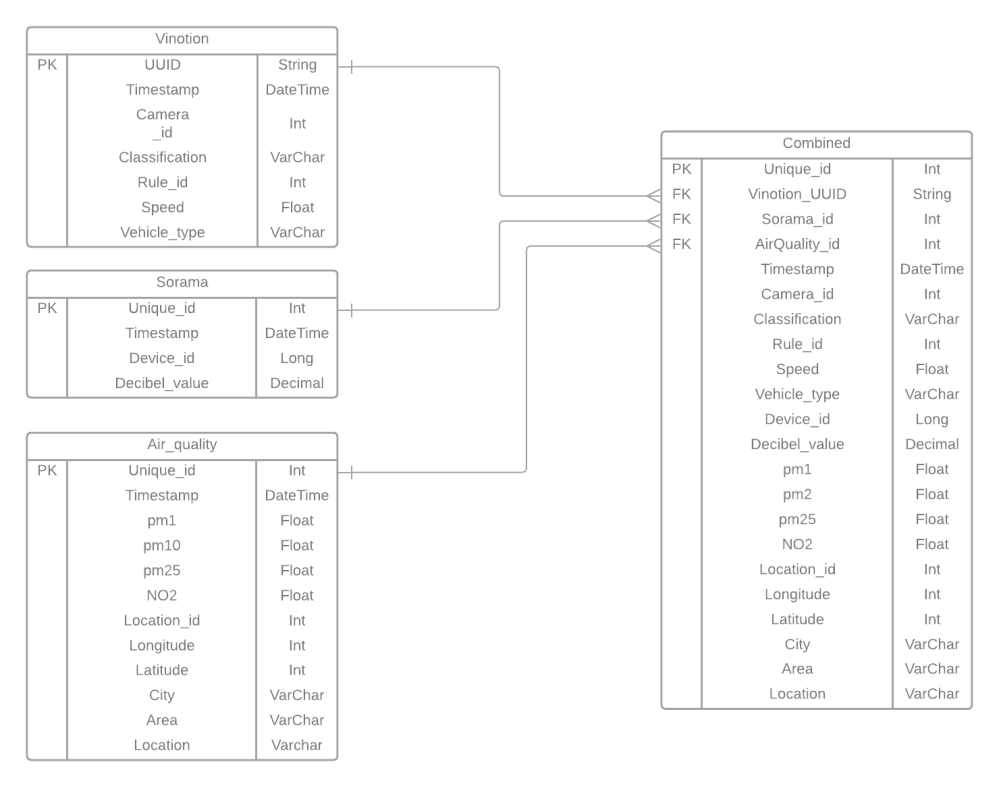

# 2) Standardisation

The common encoding format for this MIM will be in JSON.

#### Data format requirements

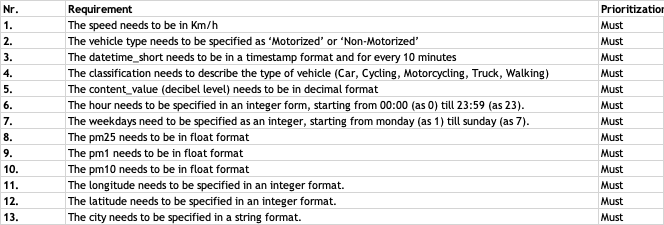

Sourced from - Citcom Business Advice report

#### Data quality requirements

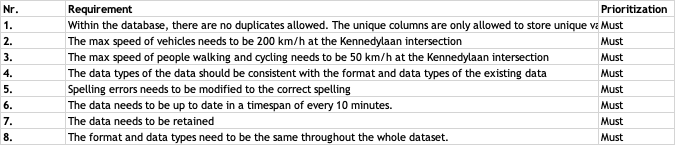

Sourced from - Citcom Business Advice report

In [20]:
from pysmartdatamodels import pysmartdatamodels as sdm



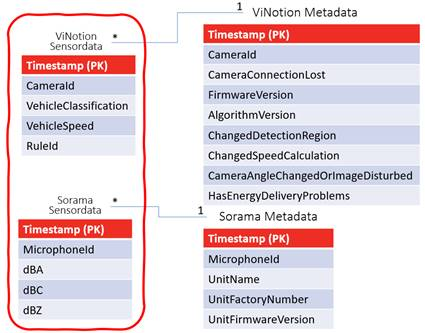

# 3) Exploratory Data Analysis

## 3.1) Vinotion Data

importing Vinotion data


In [21]:
df_vinotion_full = pd.read_csv (r'data/df_vinotion_with_seconds.csv', sep=',')
df_vinotion_full

,datetime_short,cameraId,classification,ruleId,speed,uuid
0,2021-11-02:09:51:39,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,54.49428,be698d9d-35dd-4588-8f1a-149c116c3973
1,2021-11-02:09:51:40,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,50.97996,91a1416c-c3f3-4498-9dae-8d32c0ae7457
2,2021-11-02:09:51:41,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,55.75644,ac92fd4b-807f-4ce9-ac2e-7b9ab0b8fb78
3,2021-11-02:09:51:42,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,51.20208,bf1a1528-1fe7-4558-b1e0-9f59fc5d4a88
4,2021-11-02:09:51:43,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,60.90840,c8be14e9-c24a-4542-bbc5-5e389d0a6034
...,...,...,...,...,...,...
2370144,2021-11-30:22:59:51,wss://10.252.229.14/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,38.90988,c24f5be9-2474-4b80-b54c-766398f462ec
2370145,2021-11-30:22:59:51,wss://10.252.229.13/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,44.01072,2ced7471-922d-4e35-922c-e854acf891c7
2370146,2021-11-30:22:59:51,wss://10.252.229.13/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,40.30704,7bdb8752-fd32-4cb2-b394-e7e900b95fd5
2370147,2021-11-30:22:59:56,wss://10.252.229.12/api/v2/data/main/object,Car,Application/Channel/Count/0/Processing/CountRu...,71.63712,6667479f-1b76-4a9b-905c-5387edcf16fd


In [35]:
# 1. Check for Missing Values
missing_values = df_vinotion_full.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Data Types
print("\nData Types:\n", df_vinotion_full.dtypes)



Missing Values:
 datetime_short    0
cameraId          0
classification    0
ruleId            0
speed             0
uuid              0
dtype: int64

Data Types:
 datetime_short     object
cameraId           object
classification     object
ruleId             object
speed             float64
uuid               object
dtype: object


Selecting columns

In [23]:
vinotion_columns = df_vinotion_full.columns

print(vinotion_columns)

Index(['datetime_short', 'cameraId', 'classification', 'ruleId', 'speed',
       'uuid'],
      dtype='object')


In [24]:
# Select specific columns
df_vinotion = df_vinotion_full[['datetime_short','cameraId', 'classification', 'speed', 'uuid']]  # Select columns 'A' and 'C'
df_vinotion


,datetime_short,cameraId,classification,speed,uuid
0,2021-11-02:09:51:39,wss://10.252.229.12/api/v2/data/main/object,Car,54.49428,be698d9d-35dd-4588-8f1a-149c116c3973
1,2021-11-02:09:51:40,wss://10.252.229.12/api/v2/data/main/object,Car,50.97996,91a1416c-c3f3-4498-9dae-8d32c0ae7457
2,2021-11-02:09:51:41,wss://10.252.229.12/api/v2/data/main/object,Car,55.75644,ac92fd4b-807f-4ce9-ac2e-7b9ab0b8fb78
3,2021-11-02:09:51:42,wss://10.252.229.12/api/v2/data/main/object,Car,51.20208,bf1a1528-1fe7-4558-b1e0-9f59fc5d4a88
4,2021-11-02:09:51:43,wss://10.252.229.12/api/v2/data/main/object,Car,60.90840,c8be14e9-c24a-4542-bbc5-5e389d0a6034
...,...,...,...,...,...
2370144,2021-11-30:22:59:51,wss://10.252.229.14/api/v2/data/main/object,Car,38.90988,c24f5be9-2474-4b80-b54c-766398f462ec
2370145,2021-11-30:22:59:51,wss://10.252.229.13/api/v2/data/main/object,Car,44.01072,2ced7471-922d-4e35-922c-e854acf891c7
2370146,2021-11-30:22:59:51,wss://10.252.229.13/api/v2/data/main/object,Car,40.30704,7bdb8752-fd32-4cb2-b394-e7e900b95fd5
2370147,2021-11-30:22:59:56,wss://10.252.229.12/api/v2/data/main/object,Car,71.63712,6667479f-1b76-4a9b-905c-5387edcf16fd


# 3.2) Sorama Data

In [46]:
df_sorama_full = pd.read_csv (r'data/modified_data.csv', sep=',')
df_sorama_full['deviceId'] = df_sorama_full['deviceId'].astype(str)
df_sorama_full

,deviceId,Content_time,Content_value,Date,Time,Year,Month,Hour,Datetime
0,"2,03804E+18",2021-11-02 09:49:22.310,57.077148,2021-11-02,1900-01-01 09:49:22.310,2021,11,9,2021-11-02 09:49:22.310000-01:00
1,"2,03804E+18",2021-11-02 09:49:23.310,57.639920,2021-11-02,1900-01-01 09:49:23.310,2021,11,9,2021-11-02 09:49:23.310000-01:00
2,"2,03804E+18",2021-11-02 09:49:24.310,58.501630,2021-11-02,1900-01-01 09:49:24.310,2021,11,9,2021-11-02 09:49:24.310000-01:00
3,"2,03804E+18",2021-11-02 09:49:25.310,57.684305,2021-11-02,1900-01-01 09:49:25.310,2021,11,9,2021-11-02 09:49:25.310000-01:00
4,"2,03804E+18",2021-11-02 09:49:26.310,57.416267,2021-11-02,1900-01-01 09:49:26.310,2021,11,9,2021-11-02 09:49:26.310000-01:00
...,...,...,...,...,...,...,...,...,...
1048570,"2,03804E+18",2021-11-02 09:49:06.610,58.866556,2021-11-02,1900-01-01 09:49:06.610,2021,11,9,2021-11-02 09:49:06.610000-01:00
1048571,"2,03804E+18",2021-11-02 09:49:07.610,57.896402,2021-11-02,1900-01-01 09:49:07.610,2021,11,9,2021-11-02 09:49:07.610000-01:00
1048572,"2,03804E+18",2021-11-02 09:49:08.610,58.556143,2021-11-02,1900-01-01 09:49:08.610,2021,11,9,2021-11-02 09:49:08.610000-01:00
1048573,"2,03804E+18",2021-11-02 09:49:09.610,58.915390,2021-11-02,1900-01-01 09:49:09.610,2021,11,9,2021-11-02 09:49:09.610000-01:00


Renaming Datetime to datetime_short, for to match columns for merge

In [ ]:
df_

Selecting Columns

In [26]:
sorama_columns = df_sorama_full.columns

print(sorama_columns)

Index(['deviceId', 'Content_time', 'Content_value', 'Date', 'Time', 'Year',
       'Month', 'Hour', 'Datetime'],
      dtype='object')


In [27]:
# Select specific columns
df_sorama= df_sorama_full[['Datetime','deviceId', 'Content_value']]  # Select columns 'A' and 'C'
df_sorama

,Datetime,deviceId,Content_value
0,2021-11-02 09:49:22.310000-01:00,"2,03804E+18",57.077148
1,2021-11-02 09:49:23.310000-01:00,"2,03804E+18",57.639920
2,2021-11-02 09:49:24.310000-01:00,"2,03804E+18",58.501630
3,2021-11-02 09:49:25.310000-01:00,"2,03804E+18",57.684305
4,2021-11-02 09:49:26.310000-01:00,"2,03804E+18",57.416267
...,...,...,...
1048570,2021-11-02 09:49:06.610000-01:00,"2,03804E+18",58.866556
1048571,2021-11-02 09:49:07.610000-01:00,"2,03804E+18",57.896402
1048572,2021-11-02 09:49:08.610000-01:00,"2,03804E+18",58.556143
1048573,2021-11-02 09:49:09.610000-01:00,"2,03804E+18",58.915390


# 3.3) Air Quality Data

In [28]:
df_dust = pd.read_csv (r'data/df_dust.csv', sep=',')
df_dust

,Unnamed: 0,pm25,pm1,location,timestamp,pm10,geoPointLocation,city,area,NO2
0,80,16.91,12.98,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:30:00+00:00,21.60,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
1,81,16.76,12.66,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:40:00+00:00,22.05,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
2,82,15.51,11.90,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:50:00+00:00,22.03,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
3,83,15.85,12.43,"{'type': 'Point', 'coordinates': [5.4851, 51.4...",2021-10-31 22:00:00+00:00,24.29,"{'lat': 51.4528, 'lon': 5.4851}",Eindhoven,Kennedylaan,0.0
4,84,15.59,12.24,"{'type': 'Point', 'coordinates': [5.4851, 51.4...",2021-10-31 22:10:00+00:00,22.83,"{'lat': 51.4528, 'lon': 5.4851}",Eindhoven,Kennedylaan,0.0
...,...,...,...,...,...,...,...,...,...,...
87442,3640535,11.68,10.23,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:09:59+00:00,15.57,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,0.0
87443,3640536,9.06,7.69,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:20:01+00:00,12.54,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,0.0
87444,3640537,8.02,6.35,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:30:00+00:00,10.76,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,6.0
87445,3640538,6.89,5.36,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:40:00+00:00,9.96,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,4.0


In [42]:
# Get the count of duplicate rows
duplicate_count = df_dust.duplicated().sum()

# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count)

Count of Duplicate Rows: 1714


There are 1714 duplicates out of the 87447, therefore they will be dropped since its a small amount of duplicates.

In [43]:
df_dust = df_dust.drop_duplicates()
df_dust

,Unnamed: 0,pm25,pm1,location,timestamp,pm10,geoPointLocation,city,area,NO2
0,80,16.91,12.98,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:30:00+00:00,21.60,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
1,81,16.76,12.66,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:40:00+00:00,22.05,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
2,82,15.51,11.90,"{'type': 'Point', 'coordinates': [5.485, 51.45...",2021-10-31 21:50:00+00:00,22.03,"{'lat': 51.4528, 'lon': 5.485}",Eindhoven,Kennedylaan,0.0
3,83,15.85,12.43,"{'type': 'Point', 'coordinates': [5.4851, 51.4...",2021-10-31 22:00:00+00:00,24.29,"{'lat': 51.4528, 'lon': 5.4851}",Eindhoven,Kennedylaan,0.0
4,84,15.59,12.24,"{'type': 'Point', 'coordinates': [5.4851, 51.4...",2021-10-31 22:10:00+00:00,22.83,"{'lat': 51.4528, 'lon': 5.4851}",Eindhoven,Kennedylaan,0.0
...,...,...,...,...,...,...,...,...,...,...
87442,3640535,11.68,10.23,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:09:59+00:00,15.57,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,0.0
87443,3640536,9.06,7.69,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:20:01+00:00,12.54,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,0.0
87444,3640537,8.02,6.35,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:30:00+00:00,10.76,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,6.0
87445,3640538,6.89,5.36,"{'type': 'Point', 'coordinates': [5.4852, 51.4...",2021-11-30 22:40:00+00:00,9.96,"{'lat': 51.4527, 'lon': 5.4852}",Eindhoven,Kennedylaan,4.0


# 4) Merging Data

In order to get the most value out of the data, the Vinotion, Sorama and Air quality data can be merged, since the merged data can provide more information for instance the location of the sensors, which is only in the air quality data.



## 4.1) Merging Vinotion and Sorama data

The merge will be done with a left join, with the Vinotion data being preserved.

In [47]:
merged_df = pd.merge(df_vinotion, df_sorama_full, on='datetime_short', how='left')
merged_df 

KeyError: 'datetime_short'

# Smart data models

link to guide : https://pypi.org/project/pysmartdatamodels/

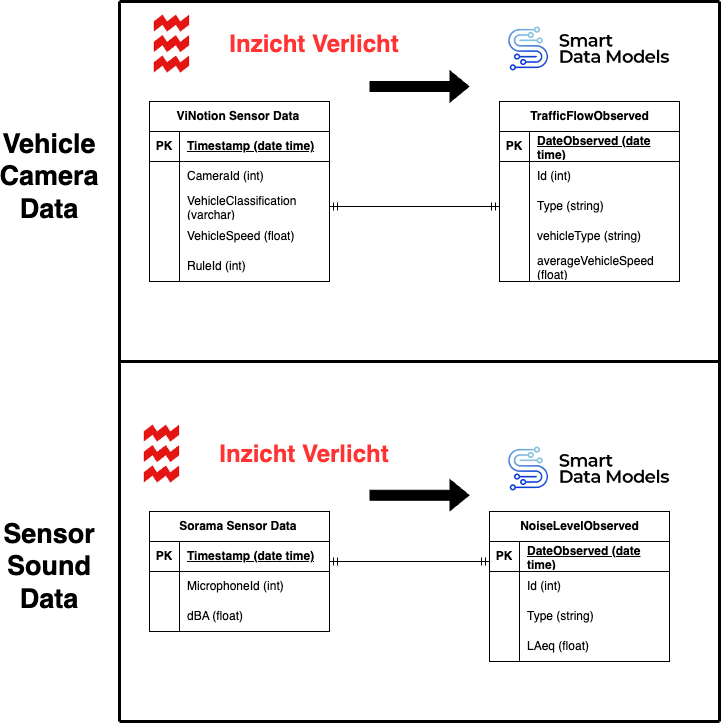

### Questions

1) For Noise levels, there is required - dateobservedFrom and dateObservedTo, no just - dateobserved.
2) averageVehicleSpeed , average?
3) Can I add properties to the smart models or must they only contain what is described?
4) What do you have in mind for the conversion? Rename columns?


# code from original notebook could be used

In [ ]:
import pandas as pd
import dataframe_image as dfi

# Assuming df_vinotion_SMD is your original dataframe
# Sample 5 rows where congested is True
df_congested_true = df_vinotion_SMD[df_vinotion_SMD['congested'] == True].sample(5)

# Sample 5 rows where congested is False
df_congested_false = df_vinotion_SMD[df_vinotion_SMD['congested'] == False].sample(5)

# Combine the two samples into one dataframe
df_subset = pd.concat([df_congested_true, df_congested_false])

# Select the specified columns
columns_to_export = ['vehicleType','averageVehicleSpeed', 'intensity', 'dataProvider', 'averageHeadwayTime', 'avg_speed_last_hour', 'speed_decrease', 'congested']
df_subset_filtered = df_subset[columns_to_export]

# Export the subset dataframe as an image
dfi.export(df_subset_filtered, 'df_vinotion_SMD_subset_filtered.png')

In [ ]:
import pandas as pd
import dataframe_image as dfi

# Assuming df_vinotion_SMD is your original dataframe
# Sample 8 rows from the dataframe
df_vinotion_export = df_vinotion_SMD.sample(8)

# Export the subset dataframe as an image
dfi.export(df_vinotion_export, 'df_vinotion_export.png')